## Homework #14.2 - Feature Selection

### Overview:
Feature Selection is reducing the input variable to your model by using
only relevant data and eliminating noise in data.

### Task:
For this chapter, you will have to do the following:
* Using Feature Selection try the algorithms you discovered and apply
them to the previous Data Sets.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from kydavra import PValueSelector, LassoSelector, PearsonCorrelationSelector, KendallCorrelationSelector, SpearmanCorrelationSelector, PointBiserialCorrSelector
from sklearn import set_config
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, FunctionTransformer, OneHotEncoder, LabelEncoder
from sklearn.svm import SVR, SVC
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, accuracy_score, classification_report, \
    confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split

### Performance of the Models without Feature Selection

#### Electrical Motor Measurements Dataset - Regression Problem

In [2]:
electrical_motors_measurement = pd.read_csv('dataset/measures_v2.csv')

In [3]:
electrical_motors_measurement.head(n=5)

,u_q,coolant,stator_winding,u_d,stator_tooth,motor_speed,i_d,i_q,pm,stator_yoke,ambient,torque,profile_id
0,-0.450682,18.805172,19.086670,-0.350055,18.293219,0.002866,0.004419,0.000328,24.554214,18.316547,19.850691,0.187101,17
1,-0.325737,18.818571,19.092390,-0.305803,18.294807,0.000257,0.000606,-0.000785,24.538078,18.314955,19.850672,0.245417,17
2,-0.440864,18.828770,19.089380,-0.372503,18.294094,0.002355,0.001290,0.000386,24.544693,18.326307,19.850657,0.176615,17
3,-0.327026,18.835567,19.083031,-0.316199,18.292542,0.006105,0.000026,0.002046,24.554018,18.330833,19.850647,0.238303,17
4,-0.471150,18.857033,19.082525,-0.332272,18.291428,0.003133,-0.064317,0.037184,24.565397,18.326662,19.850639,0.208197,17


In [4]:
electrical_motors_measurement.tail(n=5)

,u_q,coolant,stator_winding,u_d,stator_tooth,motor_speed,i_d,i_q,pm,stator_yoke,ambient,torque,profile_id
1330811,-2.152128,30.721298,45.274497,0.791801,41.934347,0.000380,-2.000169,1.097528,62.147780,38.653720,23.989078,-8.116730e-60,71
1330812,-2.258684,30.721306,45.239017,0.778900,41.868923,0.002985,-2.000499,1.097569,62.142646,38.656328,23.970700,-5.815891e-60,71
1330813,-2.130312,30.721312,45.211576,0.804914,41.804819,0.002301,-1.999268,1.098765,62.138387,38.650923,23.977234,-4.167268e-60,71
1330814,-2.268498,30.721316,45.193508,0.763091,41.762220,0.005662,-2.000999,1.095696,62.133422,38.655686,24.001421,-2.985978e-60,71
1330815,-2.100158,30.721319,45.132307,0.807309,41.734763,0.004395,-2.000792,1.096487,62.131429,38.660370,24.027522,-2.139547e-60,71


In [5]:
electrical_motors_measurement.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1330816 entries, 0 to 1330815
Data columns (total 13 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   u_q             1330816 non-null  float64
 1   coolant         1330816 non-null  float64
 2   stator_winding  1330816 non-null  float64
 3   u_d             1330816 non-null  float64
 4   stator_tooth    1330816 non-null  float64
 5   motor_speed     1330816 non-null  float64
 6   i_d             1330816 non-null  float64
 7   i_q             1330816 non-null  float64
 8   pm              1330816 non-null  float64
 9   stator_yoke     1330816 non-null  float64
 10  ambient         1330816 non-null  float64
 11  torque          1330816 non-null  float64
 12  profile_id      1330816 non-null  int64  
dtypes: float64(12), int64(1)
memory usage: 132.0 MB


In [6]:
null_counters: pd.Series = pd.Series(data=electrical_motors_measurement.isnull().sum(), name='Null Counter')
null_counters

u_q               0
coolant           0
stator_winding    0
u_d               0
stator_tooth      0
motor_speed       0
i_d               0
i_q               0
pm                0
stator_yoke       0
ambient           0
torque            0
profile_id        0
Name: Null Counter, dtype: int64

In [7]:
electrical_motors_measurement.describe()

,u_q,coolant,stator_winding,u_d,stator_tooth,motor_speed,i_d,i_q,pm,stator_yoke,ambient,torque,profile_id
count,1.330816e+06,1.330816e+06,1.330816e+06,1.330816e+06,1.330816e+06,1.330816e+06,1.330816e+06,1.330816e+06,1.330816e+06,1.330816e+06,1.330816e+06,1.330816e+06,1.330816e+06
mean,5.427900e+01,3.622999e+01,6.634275e+01,-2.513381e+01,5.687858e+01,2.202081e+03,-6.871681e+01,3.741278e+01,5.850678e+01,4.818796e+01,2.456526e+01,3.110603e+01,4.079306e+01
std,4.417323e+01,2.178615e+01,2.867206e+01,6.309197e+01,2.295223e+01,1.859663e+03,6.493323e+01,9.218188e+01,1.900150e+01,1.999100e+01,1.929522e+00,7.713575e+01,2.504549e+01
min,-2.529093e+01,1.062375e+01,1.858582e+01,-1.315304e+02,1.813398e+01,-2.755491e+02,-2.780036e+02,-2.934268e+02,2.085696e+01,1.807669e+01,8.783478e+00,-2.464667e+02,2.000000e+00
25%,1.206992e+01,1.869814e+01,4.278796e+01,-7.869090e+01,3.841601e+01,3.171107e+02,-1.154061e+02,1.095863e+00,4.315158e+01,3.199033e+01,2.318480e+01,-1.374265e-01,1.700000e+01
50%,4.893818e+01,2.690014e+01,6.511013e+01,-7.429755e+00,5.603635e+01,1.999977e+03,-5.109376e+01,1.577401e+01,6.026629e+01,4.562551e+01,2.479733e+01,1.086035e+01,4.300000e+01
75%,9.003439e+01,4.985749e+01,8.814114e+01,1.470271e+00,7.558668e+01,3.760639e+03,-2.979688e+00,1.006121e+02,7.200837e+01,6.146083e+01,2.621702e+01,9.159718e+01,6.500000e+01
max,1.330370e+02,1.015985e+02,1.413629e+02,1.314698e+02,1.119464e+02,6.000015e+03,5.189670e-02,3.017079e+02,1.136066e+02,1.011480e+02,3.071420e+01,2.610057e+02,8.100000e+01


In [8]:
electrical_motors_measurement = electrical_motors_measurement.sample(n=50000, random_state=42).reset_index(drop=True)

In [9]:
electrical_motors_measurement.drop(columns=['profile_id'], axis=1, inplace=True)

In [10]:
electrical_motors_measurement

,u_q,coolant,stator_winding,u_d,stator_tooth,motor_speed,i_d,i_q,pm,stator_yoke,ambient,torque
0,86.466103,65.036774,104.791176,-98.284904,91.937675,4999.950684,-132.641800,54.136551,90.431534,78.844124,25.714001,47.513680
1,15.378630,40.755117,113.639708,-130.061039,86.672110,4999.958502,-205.998951,76.196675,81.452672,64.649777,22.844333,75.000000
2,68.999737,33.267112,56.794665,110.739814,50.963561,4576.694931,-147.744392,-82.554835,67.810123,44.780991,23.684174,-77.061368
3,24.476531,65.758342,103.064760,-12.740853,91.052836,501.136705,-15.493681,70.795574,63.638145,80.267652,24.317449,50.000000
4,30.764919,18.708979,100.925667,-127.402679,73.858398,4499.962891,-191.776855,83.747658,73.154007,51.237759,19.926497,80.036186
...,...,...,...,...,...,...,...,...,...,...,...,...
49995,8.778641,18.602125,102.115723,-9.808155,71.639290,100.023354,-122.972702,242.423706,37.601681,52.528393,22.033829,206.657227
49996,54.430917,68.821933,97.446441,64.474056,87.806359,1550.682640,-41.260018,-133.478797,76.899059,78.873926,26.095802,-102.372382
49997,106.035673,50.577255,85.097721,-66.845144,71.284989,5363.434616,-125.118626,33.565221,64.993426,60.217577,25.769895,30.643976
49998,69.732369,81.457473,126.645437,-109.853999,104.791174,3584.943298,-127.004341,89.724764,91.461745,94.939924,27.050519,80.203643


In [11]:
X_features, y_target = electrical_motors_measurement.drop(columns=['pm']), electrical_motors_measurement['pm']

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X_features, y_target, test_size=.2, random_state=42)

In [13]:
X_train.head(n=5)

,u_q,coolant,stator_winding,u_d,stator_tooth,motor_speed,i_d,i_q,stator_yoke,ambient,torque
39087,39.824350,81.489642,104.791174,-40.943020,93.441002,943.394050,-44.665003,135.223373,87.577595,25.763040,1.022068e+02
30893,27.028433,58.775220,92.130656,41.724137,85.231951,894.882702,-54.512913,-158.452683,82.001288,26.004785,-1.238355e+02
45278,86.616768,64.624077,104.789192,-98.082588,90.588806,4999.948242,-132.543030,54.133778,78.706665,26.153452,4.753140e+01
16398,122.518395,49.886579,61.782993,-47.096822,58.306177,3999.970442,-76.327819,31.153007,53.772202,24.202153,2.500000e+01
13653,0.741192,28.210463,44.833750,-0.330747,39.452943,0.004517,-2.000252,1.096896,36.877165,26.384509,-2.665285e-52


In [14]:
y_train.head(n=5)

39087    61.431401
30893    68.189616
45278    87.760803
16398    53.146656
13653    63.581531
Name: pm, dtype: float64

In [15]:
electrical_motors_measurement.iloc[X_train.index[0]]

u_q                39.824350
coolant            81.489642
stator_winding    104.791174
u_d               -40.943020
stator_tooth       93.441002
motor_speed       943.394050
i_d               -44.665003
i_q               135.223373
pm                 61.431401
stator_yoke        87.577595
ambient            25.763040
torque            102.206770
Name: 39087, dtype: float64

In [16]:
scaler = StandardScaler()

In [17]:
X_train_scaled = pd.DataFrame(data=scaler.fit_transform(X=X_train, y=y_train), index=X_train.index, columns=X_train.columns)

In [18]:
X_test_scaled = pd.DataFrame(data=scaler.transform(X=X_test), index=X_test.index, columns=X_test.columns)

In [19]:
baseline_results_df = pd.DataFrame(columns=['Model', 'MSE', 'MAE', 'R2_SCORE'])

In [20]:
random_forest_regressor = RandomForestRegressor()

In [21]:
random_forest_regressor.fit(X=X_train_scaled, y=y_train)

RandomForestRegressor()

In [22]:
y_hat = random_forest_regressor.predict(X=X_test_scaled)

In [23]:
mse = mean_squared_error(y_true=y_test, y_pred=y_hat)
mse

5.573686571373467

In [24]:
mae = mean_absolute_error(y_true=y_test, y_pred=y_hat)
mae

1.1307270787108132

In [25]:
r2_score_val = r2_score(y_true=y_test, y_pred=y_hat)
r2_score_val

0.9842521361006561

In [26]:
baseline_results_df = pd.concat(
    [
        baseline_results_df,
        pd.DataFrame(
            data={
                'Model': ['Random Forest'],
                'MSE': [mse],
                'MAE': [mae],
                'R2_SCORE': [r2_score_val]
            }
        )
    ],
    ignore_index=True
)
baseline_results_df

C:\Users\user\AppData\Local\Temp\ipykernel_30488\3295341915.py:1: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  baseline_results_df = pd.concat(


,Model,MSE,MAE,R2_SCORE
0,Random Forest,5.573687,1.130727,0.984252


In [27]:
linear_regressor = LinearRegression()

In [28]:
linear_regressor.fit(X=X_train_scaled, y=y_train)

LinearRegression()

In [29]:
y_hat = linear_regressor.predict(X=X_test_scaled)

In [30]:
mse = mean_squared_error(y_true=y_test, y_pred=y_hat)
mse

53.50758630440144

In [31]:
mae = mean_absolute_error(y_true=y_test, y_pred=y_hat)
mae

5.477297240406051

In [32]:
r2_score_val = r2_score(y_true=y_test, y_pred=y_hat)
r2_score_val

0.8488199549949808

In [33]:
baseline_results_df = pd.concat(
    [
        baseline_results_df,
        pd.DataFrame(
            data={
                'Model': ['Linear Regression'],
                'MSE': [mse],
                'MAE': [mae],
                'R2_SCORE': [r2_score_val]
            }
        )
    ],
    ignore_index=True
)
baseline_results_df

,Model,MSE,MAE,R2_SCORE
0,Random Forest,5.573687,1.130727,0.984252
1,Linear Regression,53.507586,5.477297,0.848820


In [34]:
svm_regressor = SVR()

In [35]:
svm_regressor.fit(X=X_train_scaled, y=y_train)

SVR()

In [36]:
y_hat = svm_regressor.predict(X=X_test_scaled)

In [37]:
mse = mean_squared_error(y_true=y_test, y_pred=y_hat)
mse

42.24190652994885

In [38]:
mae = mean_absolute_error(y_true=y_test, y_pred=y_hat)
mae

4.367569450093597

In [39]:
r2_score_val = r2_score(y_true=y_test, y_pred=y_hat)
r2_score_val

0.8806499457111528

In [40]:
baseline_results_df = pd.concat(
    [
        baseline_results_df,
        pd.DataFrame(
            data={
                'Model': ['SVM_Regressor'],
                'MSE': [mse],
                'MAE': [mae],
                'R2_SCORE': [r2_score_val]
            }
        )
    ],
    ignore_index=True
)
baseline_results_df

,Model,MSE,MAE,R2_SCORE
0,Random Forest,5.573687,1.130727,0.984252
1,Linear Regression,53.507586,5.477297,0.848820
2,SVM_Regressor,42.241907,4.367569,0.880650


### P-Value Feature Selection
Null Hypothesis - a general statement that there is no relationship between two measured phenomenons (these phenomenons can also represent features).
P-Value - the probability value for a given statistical model that, if the null hypothesis is true for a set of statistical observations, is greater than or equal in magnitude to the
observed results. In other words, it describes how likely it is that your data would have occurred by random chance. It does not tell anything about the effect size, it just helps
to reject the Null Hypothesis.

In [41]:
p_values_results_df = pd.DataFrame(columns=['Model', 'MSE', 'MAE', 'R2_SCORE'])

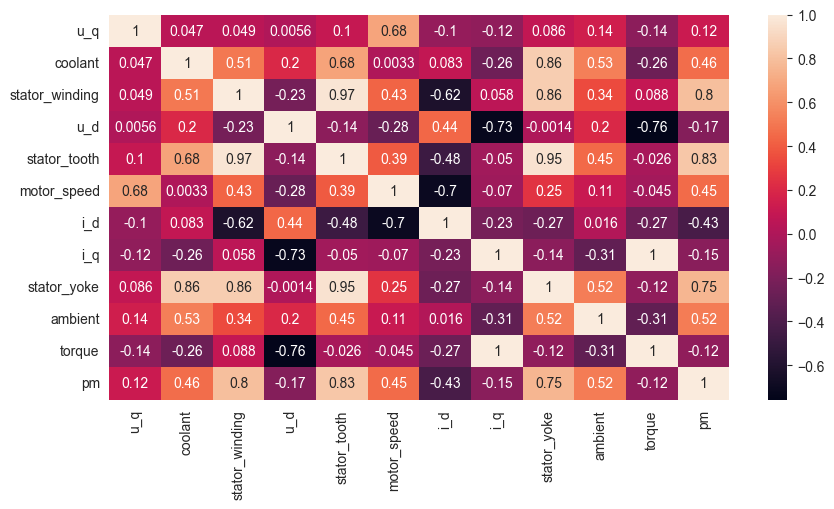

In [42]:
plt.figure(figsize=(10, 5))
sns.heatmap(data=pd.concat([X_train_scaled, y_train], axis=1).corr(), annot=True)
plt.show()

In [43]:
p_value_selector = PValueSelector()

In [44]:
selected_columns = p_value_selector.select(dataframe=pd.concat([X_train_scaled, y_train], axis=1), y_column='pm')
selected_columns

['u_q',
 'coolant',
 'stator_winding',
 'u_d',
 'stator_tooth',
 'motor_speed',
 'i_d',
 'stator_yoke',
 'ambient']

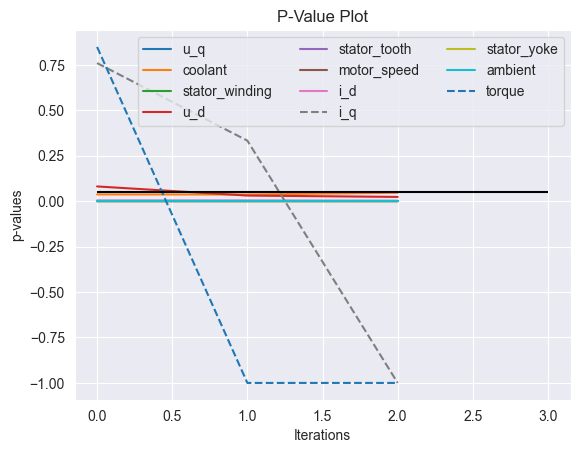

In [45]:
p_value_selector.plot_process()

In [46]:
random_forest_regressor = RandomForestRegressor()

In [47]:
random_forest_regressor.fit(X=X_train_scaled[selected_columns], y=y_train)

RandomForestRegressor()

In [48]:
y_hat = random_forest_regressor.predict(X=X_test_scaled[selected_columns])

In [49]:
mse = mean_squared_error(y_true=y_test, y_pred=y_hat)
mse

5.763620847077167

In [50]:
mae = mean_absolute_error(y_true=y_test, y_pred=y_hat)
mae

1.1393747867776867

In [51]:
r2_score_val = r2_score(y_true=y_test, y_pred=y_hat)
r2_score_val

0.9837154968251424

In [52]:
p_values_results_df = pd.concat(
    [
        p_values_results_df,
        pd.DataFrame(
            data={
                'Model': ['Random Forest'],
                'MSE': [mse],
                'MAE': [mae],
                'R2_SCORE': [r2_score_val]
            }
        )
    ],
    ignore_index=True
)
p_values_results_df

C:\Users\user\AppData\Local\Temp\ipykernel_30488\7337454.py:1: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  p_values_results_df = pd.concat(


,Model,MSE,MAE,R2_SCORE
0,Random Forest,5.763621,1.139375,0.983715


In [53]:
linear_regressor = LinearRegression()

In [54]:
linear_regressor.fit(X=X_train_scaled[selected_columns], y=y_train)

LinearRegression()

In [55]:
y_hat = linear_regressor.predict(X=X_test_scaled[selected_columns])

In [56]:
mse = mean_squared_error(y_true=y_test, y_pred=y_hat)
mse

53.599125360314304

In [57]:
mae = mean_absolute_error(y_true=y_test, y_pred=y_hat)
mae

5.487698517641489

In [58]:
r2_score_val = r2_score(y_true=y_test, y_pred=y_hat)
r2_score_val

0.8485613210413971

In [59]:
p_values_results_df = pd.concat(
    [
        p_values_results_df,
        pd.DataFrame(
            data={
                'Model': ['Linear Regression'],
                'MSE': [mse],
                'MAE': [mae],
                'R2_SCORE': [r2_score_val]
            }
        )
    ],
    ignore_index=True
)
p_values_results_df

,Model,MSE,MAE,R2_SCORE
0,Random Forest,5.763621,1.139375,0.983715
1,Linear Regression,53.599125,5.487699,0.848561


In [60]:
svm_regressor = SVR()

In [61]:
svm_regressor.fit(X=X_train_scaled[selected_columns], y=y_train)

SVR()

In [62]:
y_hat = svm_regressor.predict(X=X_test_scaled[selected_columns])

In [63]:
mse = mean_squared_error(y_true=y_test, y_pred=y_hat)
mse

42.44554641117718

In [64]:
mae = mean_absolute_error(y_true=y_test, y_pred=y_hat)
mae

4.36265876033597

In [65]:
r2_score_val = r2_score(y_true=y_test, y_pred=y_hat)
r2_score_val

0.8800745826919022

In [66]:
p_values_results_df = pd.concat(
    [
        p_values_results_df,
        pd.DataFrame(
            data={
                'Model': ['SVM_Regressor'],
                'MSE': [mse],
                'MAE': [mae],
                'R2_SCORE': [r2_score_val]
            }
        )
    ],
    ignore_index=True
)
p_values_results_df

,Model,MSE,MAE,R2_SCORE
0,Random Forest,5.763621,1.139375,0.983715
1,Linear Regression,53.599125,5.487699,0.848561
2,SVM_Regressor,42.445546,4.362659,0.880075


In [67]:
baseline_results_df

,Model,MSE,MAE,R2_SCORE
0,Random Forest,5.573687,1.130727,0.984252
1,Linear Regression,53.507586,5.477297,0.848820
2,SVM_Regressor,42.241907,4.367569,0.880650


Random Forest and Linear Regression Models performed slightly worse with selected features using P-Value. However, SVM regression model performed slightly better and obtained lower squared error and higher R2 score.

### Lasso Feature Selection
There are 2 types of regularization: L1 (Lasso Regularization) and L2 (Ridge Regularization). In the context of Lasso Regularization, it is used to perform both Feature Selection and
regularization to enhance the accuracy of the models.

Compared to P-Value selector, that selects only the columns with P-Value lower than the significance level, thus dropping features that are of no use of. In case of Feature Selection
based on L1 regularization, during the training of the model, each feature is assigned a weight that is used in computation of Cost Function, that has now a penalty coefficient,
assigning heavier weights to features that are most important and closer to 0 - for those features that are less important, making the model "exclude" the features, but not entirely,
from influencing the predictions:
$$
\begin{gather*}
E(y, \hat{y}) = \frac{1}{n}\sum_{i=1}^n (y_i - \hat{y}_i)^2 + \alpha \sum_j^f |w_j|
\end{gather*}
$$

In [68]:
lasso_results_df = pd.DataFrame(columns=['Model', 'MSE', 'MAE', 'R2_SCORE'])

In [69]:
lasso_selector = LassoSelector()

In [70]:
selected_columns = lasso_selector.select(dataframe=pd.concat([X_train_scaled, y_train], axis=1), y_column='pm', cv=2)
selected_columns

D:\Programming\Projects\Sigmoid\.venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:681: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 76897.944218711, tolerance: 72043.70521158839
  model = cd_fast.enet_coordinate_descent_gram(
D:\Programming\Projects\Sigmoid\.venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:681: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 177539.9677430092, tolerance: 72043.70521158839
  model = cd_fast.enet_coordinate_descent_gram(
D:\Programming\Projects\Sigmoid\.venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:681: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 450398.7090991774, tolerance: 72043.70521158839
  model = cd_fast.enet_coordinate_descent_gram(
D:\Programming\Projects\Sigmoid\.venv\Lib\site-packages\s

['u_q',
 'coolant',
 'stator_winding',
 'u_d',
 'stator_tooth',
 'motor_speed',
 'i_d',
 'i_q',
 'stator_yoke',
 'ambient',
 'torque']

In [71]:
# lasso_selector.plot_process()

In [72]:
random_forest_regressor = RandomForestRegressor()

In [73]:
random_forest_regressor.fit(X=X_train_scaled[selected_columns], y=y_train)

RandomForestRegressor()

In [74]:
y_hat = random_forest_regressor.predict(X=X_test_scaled[selected_columns])

In [75]:
mse = mean_squared_error(y_true=y_test, y_pred=y_hat)
mse

5.399936847524708

In [76]:
mae = mean_absolute_error(y_true=y_test, y_pred=y_hat)
mae

1.111419590179108

In [77]:
r2_score_val = r2_score(y_true=y_test, y_pred=y_hat)
r2_score_val

0.984743047630876

In [78]:
lasso_results_df = pd.concat(
    [
        lasso_results_df,
        pd.DataFrame(
            data={
                'Model': ['Random Forest'],
                'MSE': [mse],
                'MAE': [mae],
                'R2_SCORE': [r2_score_val]
            }
        )
    ],
    ignore_index=True
)
lasso_results_df

C:\Users\user\AppData\Local\Temp\ipykernel_30488\2174750233.py:1: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  lasso_results_df = pd.concat(


,Model,MSE,MAE,R2_SCORE
0,Random Forest,5.399937,1.11142,0.984743


In [79]:
linear_regressor = LinearRegression()

In [80]:
linear_regressor.fit(X=X_train_scaled[selected_columns], y=y_train)

LinearRegression()

In [81]:
y_hat = linear_regressor.predict(X=X_test_scaled[selected_columns])

In [82]:
mse = mean_squared_error(y_true=y_test, y_pred=y_hat)
mse

53.50758630440144

In [83]:
mae = mean_absolute_error(y_true=y_test, y_pred=y_hat)
mae

5.477297240406051

In [84]:
r2_score_val = r2_score(y_true=y_test, y_pred=y_hat)
r2_score_val

0.8488199549949808

In [85]:
lasso_results_df = pd.concat(
    [
        lasso_results_df,
        pd.DataFrame(
            data={
                'Model': ['Linear Regression'],
                'MSE': [mse],
                'MAE': [mae],
                'R2_SCORE': [r2_score_val]
            }
        )
    ],
    ignore_index=True
)
lasso_results_df

,Model,MSE,MAE,R2_SCORE
0,Random Forest,5.399937,1.111420,0.984743
1,Linear Regression,53.507586,5.477297,0.848820


In [86]:
svm_regressor = SVR()

In [87]:
svm_regressor.fit(X=X_train_scaled[selected_columns], y=y_train)

SVR()

In [88]:
y_hat = svm_regressor.predict(X=X_test_scaled[selected_columns])

In [89]:
mse = mean_squared_error(y_true=y_test, y_pred=y_hat)
mse

42.24190652994885

In [90]:
mae = mean_absolute_error(y_true=y_test, y_pred=y_hat)
mae

4.367569450093597

In [91]:
r2_score_val = r2_score(y_true=y_test, y_pred=y_hat)
r2_score_val

0.8806499457111528

In [92]:
lasso_results_df = pd.concat(
    [
        lasso_results_df,
        pd.DataFrame(
            data={
                'Model': ['SVM_Regressor'],
                'MSE': [mse],
                'MAE': [mae],
                'R2_SCORE': [r2_score_val]
            }
        )
    ],
    ignore_index=True
)
lasso_results_df

,Model,MSE,MAE,R2_SCORE
0,Random Forest,5.399937,1.111420,0.984743
1,Linear Regression,53.507586,5.477297,0.848820
2,SVM_Regressor,42.241907,4.367569,0.880650


In [93]:
baseline_results_df

,Model,MSE,MAE,R2_SCORE
0,Random Forest,5.573687,1.130727,0.984252
1,Linear Regression,53.507586,5.477297,0.848820
2,SVM_Regressor,42.241907,4.367569,0.880650


## Classification Problem

In [94]:
telco_dataset = pd.read_csv('dataset/WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [95]:
telco_dataset.head(n=10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [96]:
telco_dataset.tail(n=10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7033,9767-FFLEM,Male,0,No,No,38,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Credit card (automatic),69.50,2625.25,No
7034,0639-TSIQW,Female,0,No,No,67,Yes,Yes,Fiber optic,Yes,...,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),102.95,6886.25,Yes
7035,8456-QDAVC,Male,0,No,No,19,Yes,No,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Bank transfer (automatic),78.70,1495.1,No
7036,7750-EYXWZ,Female,0,No,No,12,No,No phone service,DSL,No,...,Yes,Yes,Yes,Yes,One year,No,Electronic check,60.65,743.3,No
7037,2569-WGERO,Female,0,No,No,72,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),21.15,1419.4,No
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


In [97]:
telco_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [98]:
print(telco_dataset.isnull().sum())

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


In [99]:
multiclass_columns = []
binary_columns = []
for column in telco_dataset.columns:
    if telco_dataset[column].dtype == 'object':
        print(f'{column}: {telco_dataset[column].unique()}')
        if len(telco_dataset[column].unique()) == 2:
            binary_columns.append(column)
        else:
            multiclass_columns.append(column)

customerID: ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
MultipleLines: ['No phone service' 'No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes' 'No internet service']
OnlineBackup: ['Yes' 'No' 'No internet service']
DeviceProtection: ['No' 'Yes' 'No internet service']
TechSupport: ['No' 'Yes' 'No internet service']
StreamingTV: ['No' 'Yes' 'No internet service']
StreamingMovies: ['No' 'Yes' 'No internet service']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
TotalCharges: ['29.85' '1889.5' '108.15' ... '346.45' '306.6' '6844.5']
Churn: ['No' 'Yes']


In [100]:
X_features, y_target = telco_dataset.drop(columns=['Churn']), telco_dataset['Churn']

In [101]:
X_train, X_test, y_train, y_test = train_test_split(X_features, y_target, test_size=.2, random_state=42)

In [102]:
X_train

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
2142,4223-BKEOR,Female,0,No,Yes,21,Yes,No,DSL,Yes,No,Yes,No,No,Yes,One year,No,Mailed check,64.85,1336.8
1623,6035-RIIOM,Female,0,No,No,54,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,Yes,Two year,Yes,Bank transfer (automatic),97.20,5129.45
6074,3797-VTIDR,Male,0,Yes,No,1,No,No phone service,DSL,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,23.45,23.45
1362,2568-BRGYX,Male,0,No,No,4,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.20,237.95
6754,2775-SEFEE,Male,0,No,Yes,0,Yes,Yes,DSL,Yes,Yes,No,Yes,No,No,Two year,Yes,Bank transfer (automatic),61.90,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3772,0684-AOSIH,Male,0,Yes,No,1,Yes,No,Fiber optic,Yes,No,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,95.00,95
5191,5982-PSMKW,Female,0,Yes,Yes,23,Yes,Yes,DSL,Yes,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),91.10,2198.3
5226,8044-BGWPI,Male,0,Yes,Yes,12,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Electronic check,21.15,306.05
5390,7450-NWRTR,Male,1,No,No,12,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.45,1200.15


In [103]:
X_test

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
185,1024-GUALD,Female,0,Yes,No,1,No,No phone service,DSL,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,24.80,24.8
2715,0484-JPBRU,Male,0,No,No,41,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Bank transfer (automatic),25.25,996.45
3825,3620-EHIMZ,Female,0,Yes,Yes,52,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.35,1031.7
1807,6910-HADCM,Female,0,No,No,1,Yes,No,Fiber optic,No,No,Yes,No,No,No,Month-to-month,No,Electronic check,76.35,76.35
132,8587-XYZSF,Male,0,No,No,67,Yes,No,DSL,No,No,No,Yes,No,No,Two year,No,Bank transfer (automatic),50.55,3260.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6366,2845-KDHVX,Female,0,Yes,No,64,Yes,No,DSL,No,Yes,Yes,Yes,No,Yes,Two year,Yes,Mailed check,68.30,4378.8
315,5027-YOCXN,Male,0,Yes,Yes,51,Yes,Yes,Fiber optic,Yes,Yes,No,Yes,Yes,Yes,One year,No,Credit card (automatic),110.05,5686.4
2439,8884-MRNSU,Male,0,Yes,Yes,17,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Bank transfer (automatic),19.90,329.75
5002,0567-XRHCU,Female,0,Yes,Yes,69,No,No phone service,DSL,Yes,No,Yes,No,No,Yes,Two year,Yes,Credit card (automatic),43.95,2960.1


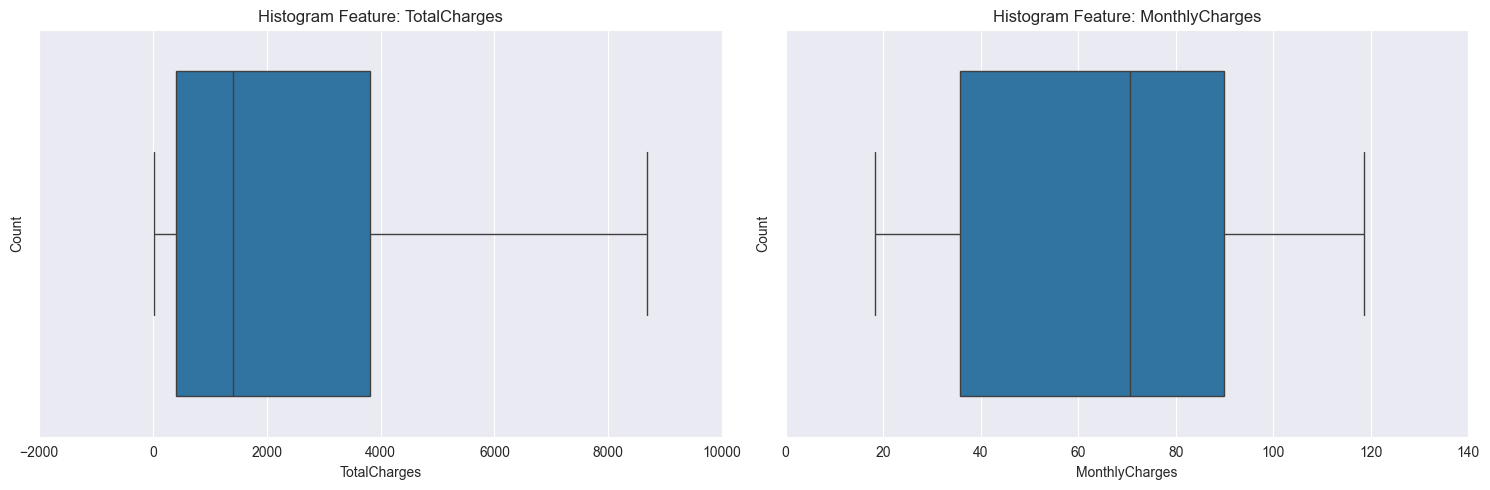

In [104]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
features = ['TotalCharges', 'MonthlyCharges']

for i, feature in enumerate(features):
    col_index = i % 2
    ax = axes[col_index]

    if feature == 'TotalCharges':
        sns.boxplot(data=pd.concat([X_train, y_train], axis=1), x=pd.to_numeric(X_train[feature], errors='coerce'), ax=ax)
    else:
        sns.boxplot(data=pd.concat([X_train, y_train], axis=1), x=feature, ax=ax)
    ax.set_title(f'Histogram Feature: {feature}')
    ax.set_xlabel(f'{feature}')
    ax.set_ylabel('Count')
    ax.set_xticks(ax.get_xticks())
plt.tight_layout()
plt.show()

In [105]:
binary_features = [feature for feature in binary_columns if feature != 'Churn']
binary_features

['gender', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling']

In [106]:
multiclass_features = [feature for feature in multiclass_columns if feature not in ['customerID', 'TotalCharges']]
multiclass_features

['MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaymentMethod']

In [107]:
set_config(transform_output="pandas")

features_to_drop = ['customerID']
features_to_convert = ['TotalCharges']

convertor = FunctionTransformer(lambda x: pd.to_numeric(x.iloc[:, 0], errors='coerce').to_frame(), validate=False)

convert_and_impute_pipeline = Pipeline(
    steps=[
        ('convert', convertor),
        ('impute', SimpleImputer(strategy='mean')),
    ]
)

column_transformer = ColumnTransformer(
    transformers=[
        ('drop', 'drop', features_to_drop),
        ('one_hot_encode_binary', OneHotEncoder(drop='first', sparse_output=False), binary_features),
        ('convert_and_impute', convert_and_impute_pipeline, features_to_convert),
        ('one_hot_encode_multiclass', OneHotEncoder(drop='first', sparse_output=False), multiclass_features),
    ],
    remainder='passthrough',
    verbose_feature_names_out=False,
)


def create_pipeline(model, feature_selector = None):
    pipeline = Pipeline([
        ('transform', column_transformer),
        ('scaler', StandardScaler())
    ])

    if feature_selector is not None:
        pipeline.steps.append(('feature_selection', feature_selector))

    pipeline.steps.append(('model', model))
    return pipeline

In [108]:
label_encoder = LabelEncoder()
y_train = pd.Series(data=label_encoder.fit_transform(y=y_train), name=y_train.name, index=y_train.index)
y_test = pd.Series(data=label_encoder.transform(y=y_test), name=y_test.name, index=y_test.index)

### Baseline Performance

In [109]:
random_forest_classifier = RandomForestClassifier(class_weight='balanced')
random_forest_classifier_pipeline = create_pipeline(random_forest_classifier)

In [110]:
logistic_regression = LogisticRegression(class_weight='balanced')
logistic_regression_pipeline = create_pipeline(logistic_regression)

In [111]:
svm_classifier = SVC(class_weight='balanced')
svm_classifier_pipeline = create_pipeline(svm_classifier)

In [112]:
random_forest_classifier_pipeline.fit(X_train, y_train)
y_hat = random_forest_classifier_pipeline.predict(X_test)
print(f'Random Forest Classifier - Accuracy Score: {accuracy_score(y_true=y_test, y_pred=y_hat)}')
print(classification_report(y_true=y_test, y_pred=y_hat))

Random Forest Classifier - Accuracy Score: 0.7934705464868701
              precision    recall  f1-score   support

           0       0.82      0.92      0.87      1036
           1       0.66      0.46      0.54       373

    accuracy                           0.79      1409
   macro avg       0.74      0.69      0.70      1409
weighted avg       0.78      0.79      0.78      1409



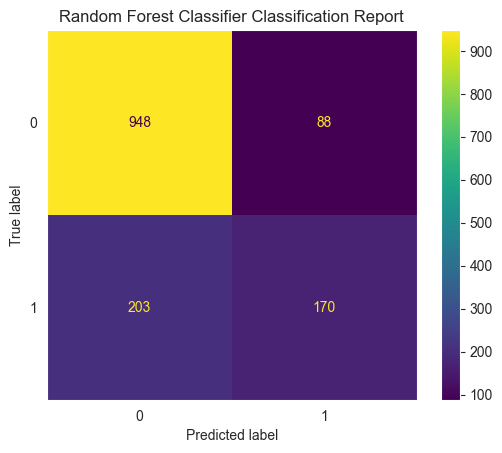

In [113]:
cm = confusion_matrix(y_test, y_hat)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title('Random Forest Classifier Classification Report')
plt.grid(False)
plt.show()

In [114]:
logistic_regression_pipeline.fit(X_train, y_train)
y_hat = logistic_regression_pipeline.predict(X_test)
print(f'Logistic Regression - Accuracy Score: {accuracy_score(y_true=y_test, y_pred=y_hat)}')
print(classification_report(y_true=y_test, y_pred=y_hat))

Logistic Regression - Accuracy Score: 0.7473385379701917
              precision    recall  f1-score   support

           0       0.92      0.72      0.81      1036
           1       0.51      0.82      0.63       373

    accuracy                           0.75      1409
   macro avg       0.72      0.77      0.72      1409
weighted avg       0.81      0.75      0.76      1409



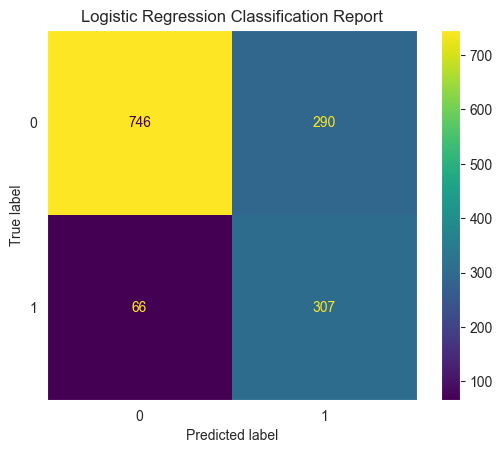

In [115]:
cm = confusion_matrix(y_test, y_hat)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title('Logistic Regression Classification Report')
plt.grid(False)
plt.show()

In [116]:
svm_classifier_pipeline.fit(X_train, y_train)
y_hat = svm_classifier_pipeline.predict(X_test)
print(f'Support Vector Machine Classifier - Accuracy Score: {accuracy_score(y_true=y_test, y_pred=y_hat)}')
print(classification_report(y_true=y_test, y_pred=y_hat))

Support Vector Machine Classifier - Accuracy Score: 0.7508871540099361
              precision    recall  f1-score   support

           0       0.91      0.73      0.81      1036
           1       0.52      0.80      0.63       373

    accuracy                           0.75      1409
   macro avg       0.72      0.77      0.72      1409
weighted avg       0.81      0.75      0.76      1409



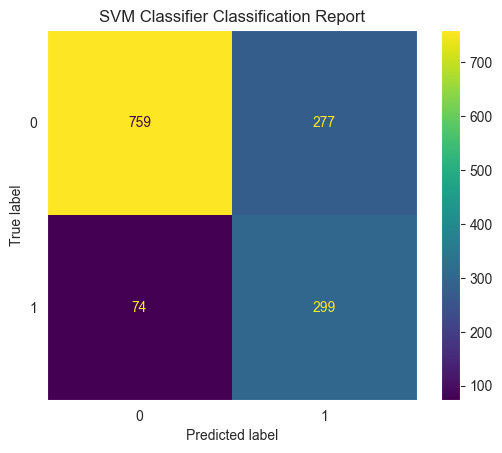

In [117]:
cm = confusion_matrix(y_test, y_hat)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title('SVM Classifier Classification Report')
plt.grid(False)
plt.show()

### Correlation Feature Selection - Pearson Correlation Selector

Correlation - is a measure that shows how similar the distribution of two numerical series is.

Pearson Correlation - measures the strength of the linear relationship between two variables.
* Assumption: Assumes a linear relationship and that data is normally distributed.
* Use Case: Suitable for continuous data when you want to measure linear associations.
* Strength: Sensitive to linear relationships, good for capturing linear trends.
* Interpretation: Measures the strength and direction of the linear relationship, ranging from -1 (perfect negative correlation) to 1 (perfect positive correlation), with 0 indicating
no linear correlation.
$$
\begin{gather*}
r_{xy} = \frac{n \sum\limits_{i=1}^n x_iy_i - \left( \sum\limits_{i=1}^n x_i \right) \left( \sum\limits_{i=1}^n y_i \right)}{\sqrt{\left[ n \sum\limits_{i=1}^n x_i^2 - \left( \sum\limits_{i=1}^n x_i \right)^2 \right] \left[ n \sum\limits_{i=1}^n y_i^2 - \left( \sum\limits_{i=1}^n y_i \right)^2 \right]}} \\
n \text{ is sample size} \\
x_i, y_i \text{ are the individual sample points indexed with } i
\end{gather*}
$$

Interpretation:
* If $r_{xy}$ is positive, it indicates a positive linear relationship.
* If $r_{xy}$ is negative, it indicates a negative linear relationship.
* If $r_{xy}$ is zero, it indicates no linear relationship.

In [118]:
class CorrelationSelectorWrapper(BaseEstimator, TransformerMixin):
    def __init__(self, selector):
        self._selected_features = None
        self.selector = selector

    def fit(self, X, y):
        if y is None:
            raise Exception("Target variable can't be None.")
        self._selected_features = self.selector.select(dataframe=pd.concat([X, y], axis=1), y_column=y.name)

        return self

    def transform(self, X):
        return X[self._selected_features]

    def get_selected_features(self) -> list:
        return self._selected_features

In [119]:
pearson_corr_selector = create_pipeline(random_forest_classifier, CorrelationSelectorWrapper(PearsonCorrelationSelector(min_corr=.2)))

<Axes: >

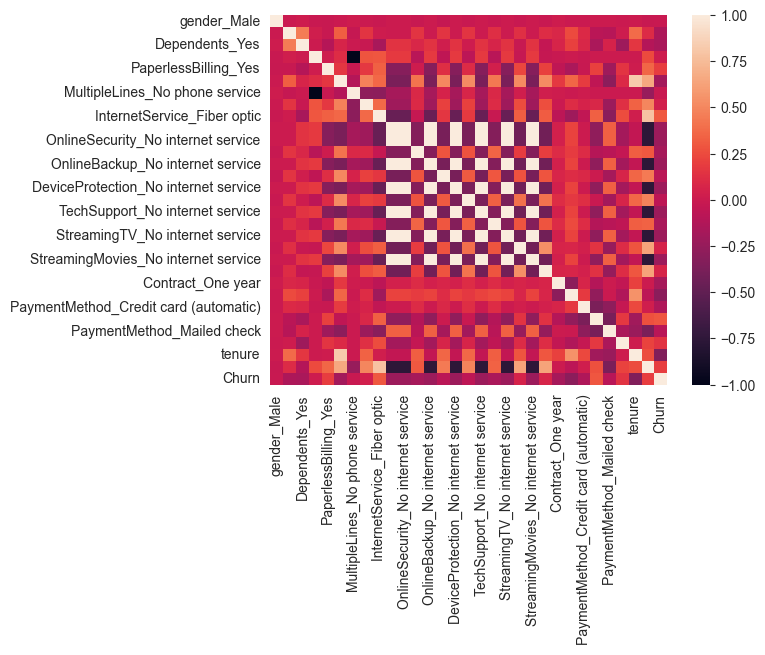

In [120]:
sns.heatmap(data=pd.concat([pearson_corr_selector[:-2].fit_transform(X=X_train, y=y_train), y_train], axis=1).corr())

In [121]:
pd.concat([pearson_corr_selector[:-2].fit_transform(X=X_train, y=y_train), y_train], axis=1).corr()['Churn'].abs().sort_values(ascending=False)

Churn                                    1.000000
tenure                                   0.344925
InternetService_Fiber optic              0.301355
Contract_Two year                        0.299840
PaymentMethod_Electronic check           0.296304
InternetService_No                       0.224203
OnlineSecurity_No internet service       0.224203
OnlineBackup_No internet service         0.224203
StreamingMovies_No internet service      0.224203
StreamingTV_No internet service          0.224203
TechSupport_No internet service          0.224203
DeviceProtection_No internet service     0.224203
TotalCharges                             0.194627
PaperlessBilling_Yes                     0.191324
MonthlyCharges                           0.188574
Contract_One year                        0.174912
OnlineSecurity_Yes                       0.172149
TechSupport_Yes                          0.162722
Dependents_Yes                           0.162356
SeniorCitizen                            0.147078


In [122]:
pearson_corr_selector = PearsonCorrelationSelector(min_corr=.2)
pearson_corr_selector_wrapper = CorrelationSelectorWrapper(selector=pearson_corr_selector)

In [123]:
random_forest_classifier = RandomForestClassifier(class_weight='balanced')
random_forest_classifier_pipeline = create_pipeline(random_forest_classifier, pearson_corr_selector_wrapper)

In [124]:
logistic_regression = LogisticRegression(class_weight='balanced')
logistic_regression_pipeline = create_pipeline(logistic_regression, pearson_corr_selector_wrapper)

In [125]:
svm_classifier = SVC(class_weight='balanced')
svm_classifier_pipeline = create_pipeline(svm_classifier, pearson_corr_selector_wrapper)

In [126]:
random_forest_classifier_pipeline.fit(X_train, y_train)
y_hat = random_forest_classifier_pipeline.predict(X_test)
print(f'Random Forest Classifier - Accuracy Score: {accuracy_score(y_true=y_test, y_pred=y_hat)}')
print(classification_report(y_true=y_test, y_pred=y_hat))

Random Forest Classifier - Accuracy Score: 0.7395315826827538
              precision    recall  f1-score   support

           0       0.91      0.72      0.80      1036
           1       0.51      0.79      0.62       373

    accuracy                           0.74      1409
   macro avg       0.71      0.76      0.71      1409
weighted avg       0.80      0.74      0.75      1409



In [127]:
random_forest_classifier_pipeline[-2].get_selected_features()

['InternetService_Fiber optic',
 'InternetService_No',
 'OnlineSecurity_No internet service',
 'OnlineBackup_No internet service',
 'DeviceProtection_No internet service',
 'TechSupport_No internet service',
 'StreamingTV_No internet service',
 'StreamingMovies_No internet service',
 'Contract_Two year',
 'PaymentMethod_Electronic check',
 'tenure']

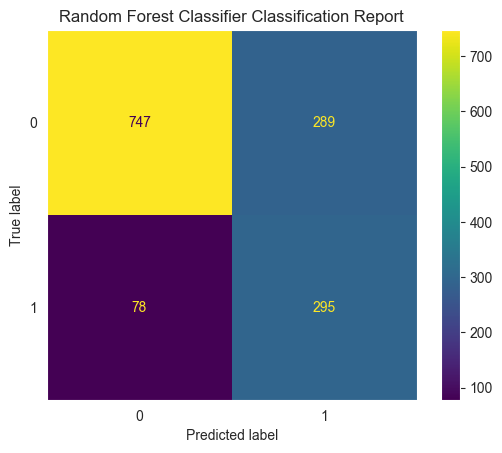

In [128]:
cm = confusion_matrix(y_test, y_hat)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title('Random Forest Classifier Classification Report')
plt.grid(False)
plt.show()

In [129]:
logistic_regression_pipeline.fit(X_train, y_train)
y_hat = logistic_regression_pipeline.predict(X_test)
print(f'Logistic Regression - Accuracy Score: {accuracy_score(y_true=y_test, y_pred=y_hat)}')
print(classification_report(y_true=y_test, y_pred=y_hat))

Logistic Regression - Accuracy Score: 0.7402413058907026
              precision    recall  f1-score   support

           0       0.91      0.71      0.80      1036
           1       0.51      0.82      0.62       373

    accuracy                           0.74      1409
   macro avg       0.71      0.76      0.71      1409
weighted avg       0.81      0.74      0.75      1409



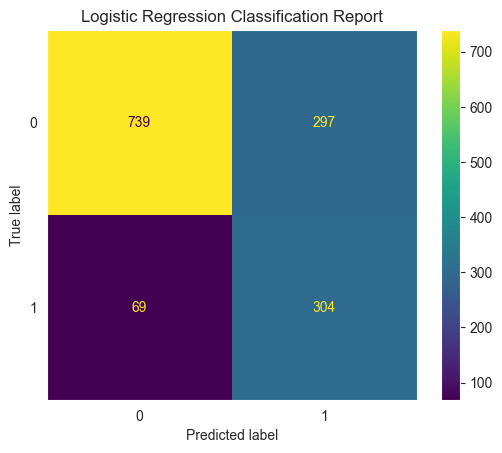

In [130]:
cm = confusion_matrix(y_test, y_hat)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title('Logistic Regression Classification Report')
plt.grid(False)
plt.show()

In [131]:
svm_classifier_pipeline.fit(X_train, y_train)
y_hat = svm_classifier_pipeline.predict(X_test)
print(f'Support Vector Machine Classifier - Accuracy Score: {accuracy_score(y_true=y_test, y_pred=y_hat)}')
print(classification_report(y_true=y_test, y_pred=y_hat))

Support Vector Machine Classifier - Accuracy Score: 0.7395315826827538
              precision    recall  f1-score   support

           0       0.92      0.71      0.80      1036
           1       0.50      0.82      0.62       373

    accuracy                           0.74      1409
   macro avg       0.71      0.76      0.71      1409
weighted avg       0.81      0.74      0.75      1409



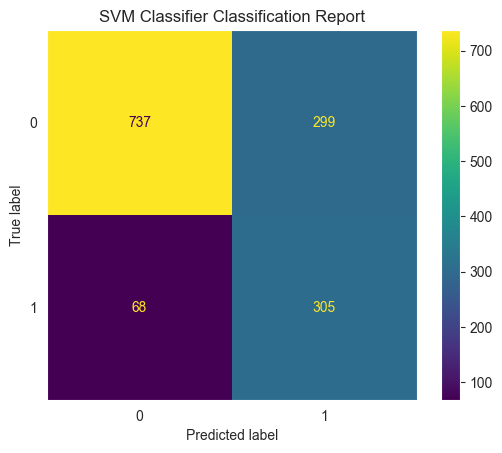

In [132]:
cm = confusion_matrix(y_test, y_hat)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title('SVM Classifier Classification Report')
plt.grid(False)
plt.show()

### Correlation Feature Selection - Kendall Correlation Selector

Kendall Correlation - is a measure of the correspondence between two rankings. Values close to 1 indicate strong agreement, values close to -1 indicate strong disagreement.
* Assumption: Non-parametric and makes no assumptions about the data distribution.
* Use Case: Suitable for both continuous and ordinal (ranked) data. Useful when the data may not follow a linear relationship.
* Strength: Robust to outliers and non-linearity.
* Interpretation: Measures the similarity in ranking order between two variables, where 1 indicates perfect agreement, -1 indicates perfect disagreement, and 0 suggests no association.

$$
\begin{gather*}
\tau_b = \frac{P-Q}{\sqrt{\left( P + Q + T \right) \cdot \left( P + Q + U \right)}} \\
P \text{ is number of concordant pairs} \\
Q \text{ is number of discordant pairs} \\
T \text{ is number of ties only in }x \\
U \text{ is number of ties only in }y \\
\end{gather*}
$$

* Concordant Pairs: for concordant pairs, if one data point ranks higher (or lower) in one variable, it also ranks higher (or lower) in the other variable. In other words, they are pairs
of data points that have the same order (either both increasing or both decreasing) in both variables.
* Discordant pairs: for discordant pairs, if one data point ranks higher (or lower) in one variable, it ranks lower (or higher) in the other variable. In other words, they are pairs of
data points that have opposite order in the two variables (one increasing while the other decreasing).

Interpretation:
* If $\tau=1$, it indicates a perfect agreement in rankings, suggesting a strong positive association.
* If $\tau=−1$, it indicates a perfect disagreement in rankings, suggesting a strong negative association.
* If $\tau=0$, it suggests no association between the rankings, indicating independence or randomness.

In general, a positive τ value implies that as one variable increases, the other tends to increase in rank as well, and vice versa for negative τ values.

The magnitude of τ indicates the strength of the association, with larger values indicating stronger associations.

In [133]:
kendall_corr_selector = create_pipeline(random_forest_classifier, CorrelationSelectorWrapper(KendallCorrelationSelector(min_corr=.2)))

In [134]:
corr_map = pd.concat([kendall_corr_selector[:-2].fit_transform(X=X_train, y=y_train), y_train], axis=1).corr(method='kendall')

<Axes: >

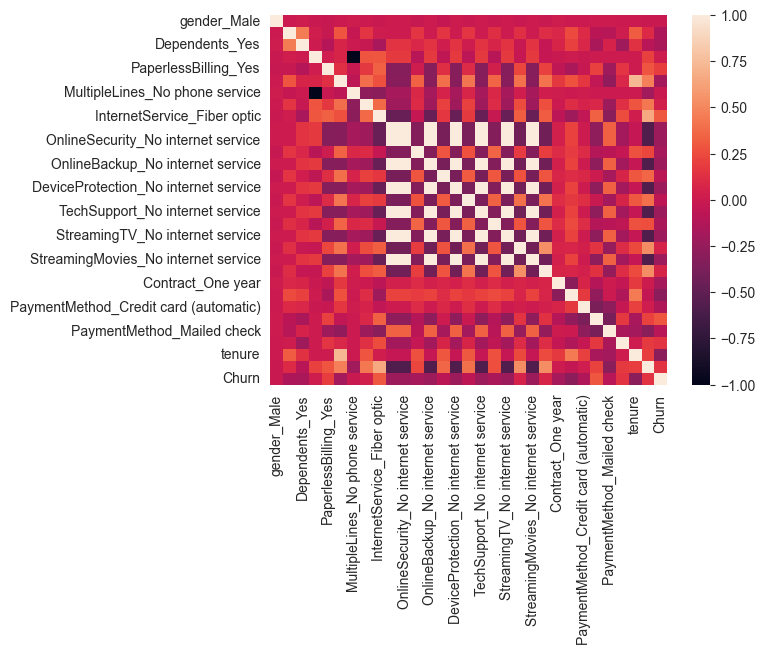

In [135]:
sns.heatmap(data=corr_map)

In [136]:
corr_map['Churn'].abs().sort_values(ascending=False)

Churn                                    1.000000
InternetService_Fiber optic              0.301355
Contract_Two year                        0.299840
tenure                                   0.297128
PaymentMethod_Electronic check           0.296304
InternetService_No                       0.224203
OnlineSecurity_No internet service       0.224203
OnlineBackup_No internet service         0.224203
StreamingMovies_No internet service      0.224203
StreamingTV_No internet service          0.224203
TechSupport_No internet service          0.224203
DeviceProtection_No internet service     0.224203
PaperlessBilling_Yes                     0.191324
TotalCharges                             0.185595
Contract_One year                        0.174912
OnlineSecurity_Yes                       0.172149
TechSupport_Yes                          0.162722
Dependents_Yes                           0.162356
SeniorCitizen                            0.147078
MonthlyCharges                           0.146800


In [137]:
kendall_corr_selector = KendallCorrelationSelector(min_corr=.2)
kendall_corr_selector_wrapper = CorrelationSelectorWrapper(kendall_corr_selector)

In [138]:
random_forest_classifier = RandomForestClassifier(class_weight='balanced')
random_forest_classifier_pipeline = create_pipeline(random_forest_classifier, kendall_corr_selector_wrapper)

In [139]:
logistic_regression = LogisticRegression(class_weight='balanced')
logistic_regression_pipeline = create_pipeline(logistic_regression, kendall_corr_selector_wrapper)

In [140]:
svm_classifier = SVC(class_weight='balanced')
svm_classifier_pipeline = create_pipeline(svm_classifier, kendall_corr_selector_wrapper)

In [141]:
random_forest_classifier_pipeline.fit(X_train, y_train)
y_hat = random_forest_classifier_pipeline.predict(X_test)
print(f'Random Forest Classifier - Accuracy Score: {accuracy_score(y_true=y_test, y_pred=y_hat)}')
print(classification_report(y_true=y_test, y_pred=y_hat))

Random Forest Classifier - Accuracy Score: 0.7409510290986515
              precision    recall  f1-score   support

           0       0.91      0.72      0.80      1036
           1       0.51      0.79      0.62       373

    accuracy                           0.74      1409
   macro avg       0.71      0.76      0.71      1409
weighted avg       0.80      0.74      0.75      1409



In [142]:
random_forest_classifier_pipeline[-2].get_selected_features()

['InternetService_Fiber optic',
 'InternetService_No',
 'OnlineSecurity_No internet service',
 'OnlineBackup_No internet service',
 'DeviceProtection_No internet service',
 'TechSupport_No internet service',
 'StreamingTV_No internet service',
 'StreamingMovies_No internet service',
 'Contract_Two year',
 'PaymentMethod_Electronic check',
 'tenure']

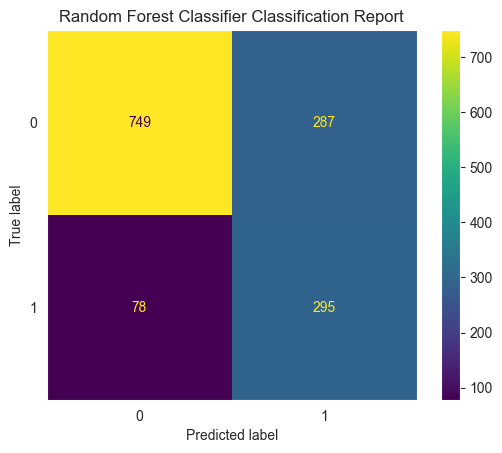

In [143]:
cm = confusion_matrix(y_test, y_hat)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title('Random Forest Classifier Classification Report')
plt.grid(False)
plt.show()

In [144]:
logistic_regression_pipeline.fit(X_train, y_train)
y_hat = logistic_regression_pipeline.predict(X_test)
print(f'Logistic Regression - Accuracy Score: {accuracy_score(y_true=y_test, y_pred=y_hat)}')
print(classification_report(y_true=y_test, y_pred=y_hat))

Logistic Regression - Accuracy Score: 0.7402413058907026
              precision    recall  f1-score   support

           0       0.91      0.71      0.80      1036
           1       0.51      0.82      0.62       373

    accuracy                           0.74      1409
   macro avg       0.71      0.76      0.71      1409
weighted avg       0.81      0.74      0.75      1409



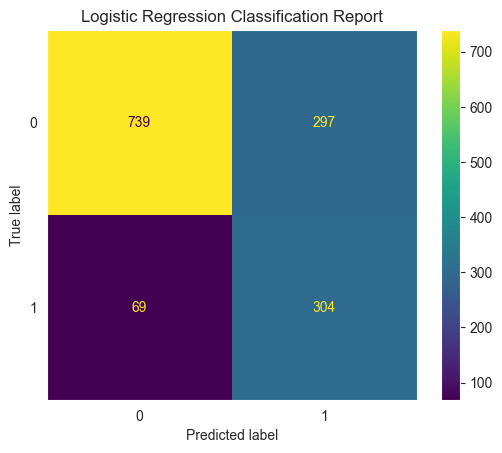

In [145]:
cm = confusion_matrix(y_test, y_hat)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title('Logistic Regression Classification Report')
plt.grid(False)
plt.show()

In [146]:
svm_classifier_pipeline.fit(X_train, y_train)
y_hat = svm_classifier_pipeline.predict(X_test)
print(f'Support Vector Machine Classifier - Accuracy Score: {accuracy_score(y_true=y_test, y_pred=y_hat)}')
print(classification_report(y_true=y_test, y_pred=y_hat))

Support Vector Machine Classifier - Accuracy Score: 0.7395315826827538
              precision    recall  f1-score   support

           0       0.92      0.71      0.80      1036
           1       0.50      0.82      0.62       373

    accuracy                           0.74      1409
   macro avg       0.71      0.76      0.71      1409
weighted avg       0.81      0.74      0.75      1409



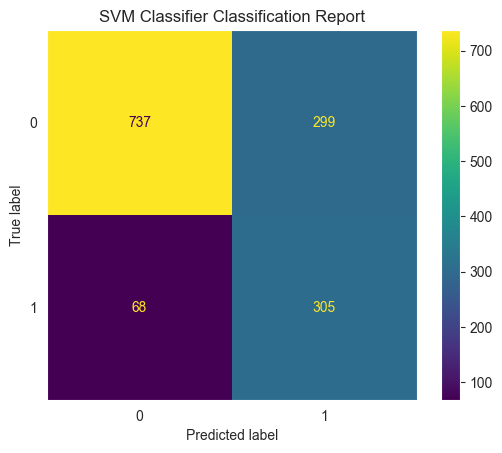

In [147]:
cm = confusion_matrix(y_test, y_hat)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title('SVM Classifier Classification Report')
plt.grid(False)
plt.show()

### Correlation Feature Selection - Spearman Correlation Selector

Spearman Correlation - is a nonparametric measure of the monotonicity of the relationship between two datasets. In other words, Spearman’s Rank Correlation is a statistical measure of
the strength and direction of the monotonic (non-linear) relationship between two continuous variables.

* Assumption: Non-parametric and does not assume a linear relationship but assumes a monotonic relationship.
* Use Case: Appropriate for both continuous and ordinal data. Particularly useful when the relationship is expected to be monotonic but not necessarily linear.
* Strength: Robust to outliers and non-linearity.
* Interpretation: Measures the strength and direction of the monotonic relationship, similar to Kendall’s Tau.

$$
\begin{gather*}
\rho = 1 - \frac{6 \cdot \sum \limits_{i=1}^n d_i^2}{n \left( n^2 - 1 \right)} \\
d_i \text{ is difference between the 2 ranks of each observation} \\
n \text{ is the number of observations}
\end{gather*}
$$

Rank - the position or order of a variable’s value relative to other values within a dataset

Interpretation:
* If $\rho \le 1$, it indicates a positive monotonic relationship, suggesting a strong positive association.
* If $\rho \ge −1$, it indicates a negative monotonic relationship, suggesting a strong negative association.
* If $\rho = 0$, it suggests no association between the rankings, indicating independence or randomness.

Example:
<center>
1. Dataset

| **Number** | **X1** | **Y1** |
|:----------:|:------:|:------:|
|     _1_    |    7   |    5   |
|     _2_    |    6   |    4   |
|     _3_    |    4   |    5   |
|     _4_    |    5   |    6   |
|     _5_    |    8   |   10   |
|     _6_    |    7   |    7   |
|     _7_    |   10   |    9   |
|     _8_    |    3   |    2   |
|     _9_    |    9   |    8   |
|    _10_    |    2   |    1   |

</center>

2. Creating Ranks for $[7, 6, 4, 5, 8, 7, 10, 3, 9, 2]$:
    1. Sort the values in ascending order: $[2, 3, 4, 5, 6, 7, 7, 8, 9, 10]$.
    2. Assign ranks based on the sorted order: $[1, 2, 3, 4, 5,6.5, 6.5, 8, 9, 10]$. Since there are two tied values ($6$ and $7$), their average rank is assigned $(6.5)$.

<center>

| **Number** | **Rank X1** | **Rank Y1** |
|:----------:|:-----------:|:-----------:|
|     _1_    |     6.5     |     4.5     |
|     _2_    |      5      |      3      |
|     _3_    |      3      |     4.5     |
|     _4_    |      4      |      6      |
|     _5_    |      8      |      10     |
|     _6_    |     6.5     |      7      |
|     _7_    |      10     |      9      |
|     _8_    |      2      |      2      |
|     _9_    |      9      |      8      |
|    _10_    |      1      |      1      |

</center>

3. Find out the square of the difference in the ranks given to the two variables values for each item of the data: $d = (X1 - Y1)^2$.

<center>

| **Number** | **1** | **2** | **3** | **4** | **5** | **6** | **7** | **8** | **9** | **10** |
|:----------:|:-----:|:-----:|:-----:|:-----:|:-----:|:-----:|:-----:|:-----:|:-----:|:------:|
|    _X1_    |   7   |   6   |   4   |   5   |   8   |   7   |   10  |   3   |   9   |    2   |
|    _Y1_    |   5   |   4   |   5   |   6   |   10  |   7   |   9   |   2   |   8   |    1   |
|  _Rank X1_ |  6.5  |   5   |   3   |   4   |   8   |  6.5  |   10  |   2   |   9   |    1   |
|  _Rank Y1_ |  4.5  |   3   |  4.5  |   6   |   10  |   7   |   9   |   2   |   8   |    1   |
|    _d2_    |   4   |   4   |  2.25 |   4   |   4   |  0.25 |   1   |   0   |   1   |    0   |

</center>

4. Calculate $\rho$:
$$
\begin{gather*}
\rho = 1 - \frac{6 \cdot \sum \limits_{i=1}^n d_i^2}{n \left( n^2 - 1 \right)} = 1 - \frac{6(4+4+2.25+4+4+0.25+1+0+1+0)}{10(10^2−1)} = 1 - \frac{6 \times 20.5}{990} = 1 - \frac{123}{990} = 1 - 0.12(42) = 0.8(75) \approx 0.88 \\
\end{gather*}
$$

In [148]:
spearman_corr_selector = create_pipeline(random_forest_classifier, CorrelationSelectorWrapper(SpearmanCorrelationSelector(min_corr=.2)))

In [149]:
corr_map = pd.concat([spearman_corr_selector[:-2].fit_transform(X=X_train, y=y_train), y_train], axis=1).corr(method='spearman')

<Axes: >

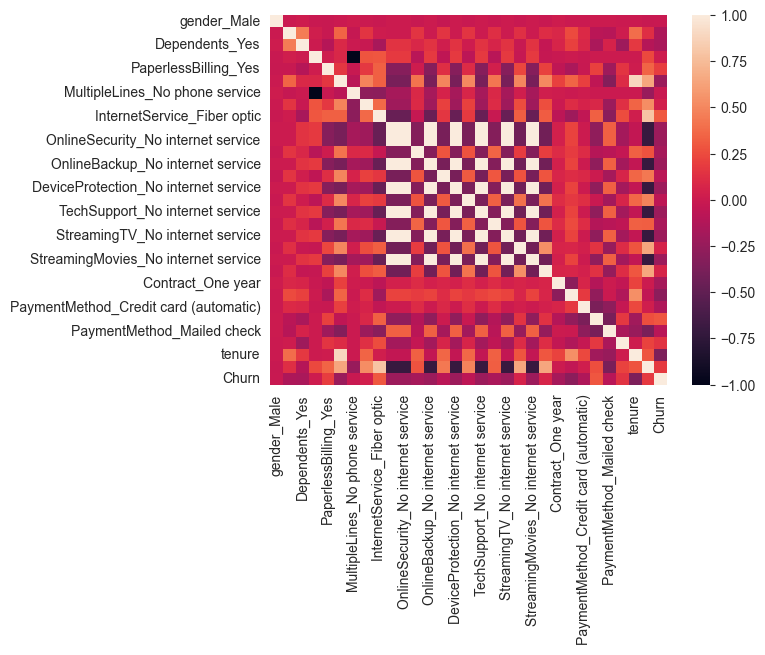

In [150]:
sns.heatmap(data=corr_map)

In [151]:
corr_map['Churn'].abs().sort_values(ascending=False)

Churn                                    1.000000
tenure                                   0.360075
InternetService_Fiber optic              0.301355
Contract_Two year                        0.299840
PaymentMethod_Electronic check           0.296304
TotalCharges                             0.227283
InternetService_No                       0.224203
OnlineBackup_No internet service         0.224203
StreamingMovies_No internet service      0.224203
StreamingTV_No internet service          0.224203
TechSupport_No internet service          0.224203
DeviceProtection_No internet service     0.224203
OnlineSecurity_No internet service       0.224203
PaperlessBilling_Yes                     0.191324
MonthlyCharges                           0.179655
Contract_One year                        0.174912
OnlineSecurity_Yes                       0.172149
TechSupport_Yes                          0.162722
Dependents_Yes                           0.162356
SeniorCitizen                            0.147078


In [152]:
spearman_corr_selector = SpearmanCorrelationSelector(min_corr=.2)
spearman_corr_selector_wrapper = CorrelationSelectorWrapper(spearman_corr_selector)

In [153]:
random_forest_classifier = RandomForestClassifier(class_weight='balanced')
random_forest_classifier_pipeline = create_pipeline(random_forest_classifier, spearman_corr_selector_wrapper)

In [154]:
logistic_regression = LogisticRegression(class_weight='balanced')
logistic_regression_pipeline = create_pipeline(logistic_regression, spearman_corr_selector_wrapper)

In [155]:
svm_classifier = SVC(class_weight='balanced')
svm_classifier_pipeline = create_pipeline(svm_classifier, spearman_corr_selector_wrapper)

In [156]:
random_forest_classifier_pipeline.fit(X_train, y_train)
y_hat = random_forest_classifier_pipeline.predict(X_test)
print(f'Random Forest Classifier - Accuracy Score: {accuracy_score(y_true=y_test, y_pred=y_hat)}')
print(classification_report(y_true=y_test, y_pred=y_hat))

Random Forest Classifier - Accuracy Score: 0.7650816181689141
              precision    recall  f1-score   support

           0       0.83      0.86      0.84      1036
           1       0.56      0.51      0.53       373

    accuracy                           0.77      1409
   macro avg       0.70      0.68      0.69      1409
weighted avg       0.76      0.77      0.76      1409



In [157]:
random_forest_classifier_pipeline[-2].get_selected_features()

['TotalCharges',
 'InternetService_Fiber optic',
 'InternetService_No',
 'OnlineSecurity_No internet service',
 'OnlineBackup_No internet service',
 'DeviceProtection_No internet service',
 'TechSupport_No internet service',
 'StreamingTV_No internet service',
 'StreamingMovies_No internet service',
 'Contract_Two year',
 'PaymentMethod_Electronic check',
 'tenure']

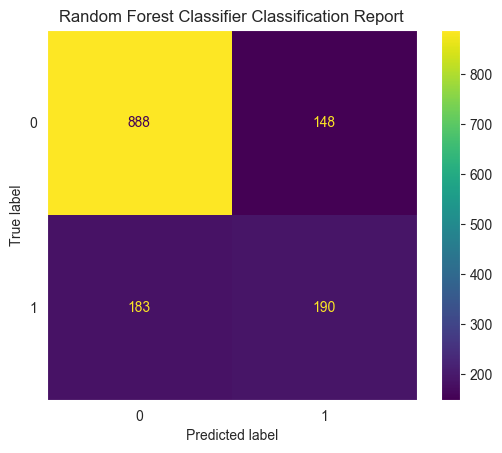

In [158]:
cm = confusion_matrix(y_test, y_hat)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title('Random Forest Classifier Classification Report')
plt.grid(False)
plt.show()

In [159]:
logistic_regression_pipeline.fit(X_train, y_train)
y_hat = logistic_regression_pipeline.predict(X_test)
print(f'Logistic Regression - Accuracy Score: {accuracy_score(y_true=y_test, y_pred=y_hat)}')
print(classification_report(y_true=y_test, y_pred=y_hat))

Logistic Regression - Accuracy Score: 0.7359829666430092
              precision    recall  f1-score   support

           0       0.92      0.70      0.80      1036
           1       0.50      0.83      0.63       373

    accuracy                           0.74      1409
   macro avg       0.71      0.77      0.71      1409
weighted avg       0.81      0.74      0.75      1409



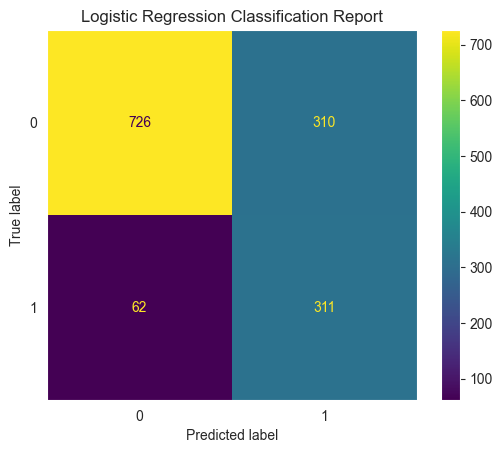

In [160]:
cm = confusion_matrix(y_test, y_hat)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title('Logistic Regression Classification Report')
plt.grid(False)
plt.show()

In [161]:
svm_classifier_pipeline.fit(X_train, y_train)
y_hat = svm_classifier_pipeline.predict(X_test)
print(f'Support Vector Machine Classifier - Accuracy Score: {accuracy_score(y_true=y_test, y_pred=y_hat)}')
print(classification_report(y_true=y_test, y_pred=y_hat))

Support Vector Machine Classifier - Accuracy Score: 0.7409510290986515
              precision    recall  f1-score   support

           0       0.92      0.71      0.80      1036
           1       0.51      0.84      0.63       373

    accuracy                           0.74      1409
   macro avg       0.71      0.77      0.72      1409
weighted avg       0.81      0.74      0.76      1409



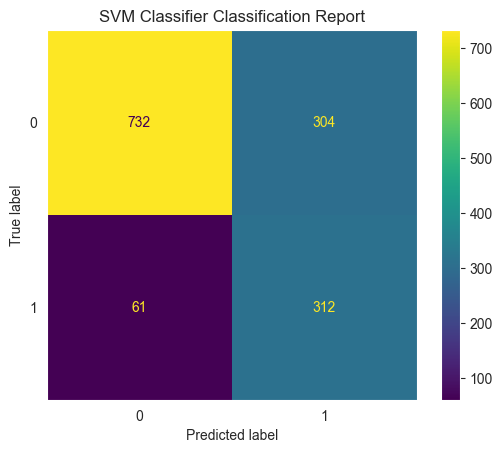

In [162]:
cm = confusion_matrix(y_test, y_hat)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title('SVM Classifier Classification Report')
plt.grid(False)
plt.show()

### Point-Biserial Feature Selection

Point biserial correlation - is a special case of Pearson correlation and examines the relationship between a dichotomous variable and a metric variable.

A dichotomous variable - is a variable with two expressions (binary).

$$
\begin{gather*}
r_{pb} = \frac{\overline{x_2} - \overline{x_1}}{\sigma_x} \cdot \sqrt{\frac{n_1 \cdot n_2}{n^2}} \\
\overline{x_1} \text{ is mean value of samples in X such that $y = 1$} \\
\overline{x_2} \text{ is mean value of samples in X such that $y = 0$} \\
\sigma_x \text{ is the standard deviation for the entire feature $x = x_1 + x_2$} \\
n_1 \text{ is the total number of samples in X such that $y = 1$} \\
n_2 \text{ is the total number of samples in X such that $y = 0$} \\
n \text{ is the total number of samples in X} \\
\end{gather*}
$$

Interpretation:
* If $r_{pb}$ is positive, it indicates a positive relationship.
* If $r_{pb}$ is negative, it indicates a negative relationship.
* If $r_{pb}$ is zero, it indicates no relationship.

In [163]:
point_biserial_corr_selector = PointBiserialCorrSelector(min_corr=.2)
point_biserial_corr_selector_wrapper = CorrelationSelectorWrapper(point_biserial_corr_selector)

In [164]:
random_forest_classifier = RandomForestClassifier(class_weight='balanced')
random_forest_classifier_pipeline = create_pipeline(random_forest_classifier, point_biserial_corr_selector_wrapper)

In [165]:
logistic_regression = LogisticRegression(class_weight='balanced')
logistic_regression_pipeline = create_pipeline(logistic_regression, point_biserial_corr_selector_wrapper)

In [166]:
svm_classifier = SVC(class_weight='balanced')
svm_classifier_pipeline = create_pipeline(svm_classifier, point_biserial_corr_selector_wrapper)

In [167]:
random_forest_classifier_pipeline.fit(X_train, y_train)
y_hat = random_forest_classifier_pipeline.predict(X_test)
print(f'Random Forest Classifier - Accuracy Score: {accuracy_score(y_true=y_test, y_pred=y_hat)}')
print(classification_report(y_true=y_test, y_pred=y_hat))

Random Forest Classifier - Accuracy Score: 0.7437899219304471
              precision    recall  f1-score   support

           0       0.91      0.73      0.81      1036
           1       0.51      0.79      0.62       373

    accuracy                           0.74      1409
   macro avg       0.71      0.76      0.71      1409
weighted avg       0.80      0.74      0.76      1409



In [168]:
random_forest_classifier_pipeline[-2].get_selected_features()

['InternetService_Fiber optic',
 'tenure',
 'InternetService_No',
 'OnlineSecurity_No internet service',
 'OnlineBackup_No internet service',
 'DeviceProtection_No internet service',
 'TechSupport_No internet service',
 'StreamingTV_No internet service',
 'StreamingMovies_No internet service',
 'Contract_Two year',
 'PaymentMethod_Electronic check']

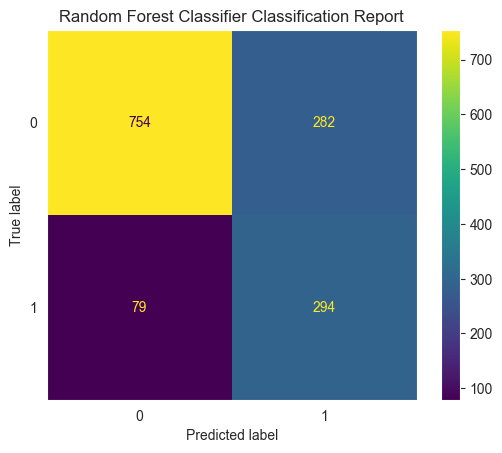

In [169]:
cm = confusion_matrix(y_test, y_hat)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title('Random Forest Classifier Classification Report')
plt.grid(False)
plt.show()

In [170]:
logistic_regression_pipeline.fit(X_train, y_train)
y_hat = logistic_regression_pipeline.predict(X_test)
print(f'Logistic Regression - Accuracy Score: {accuracy_score(y_true=y_test, y_pred=y_hat)}')
print(classification_report(y_true=y_test, y_pred=y_hat))

Logistic Regression - Accuracy Score: 0.7402413058907026
              precision    recall  f1-score   support

           0       0.91      0.71      0.80      1036
           1       0.51      0.82      0.62       373

    accuracy                           0.74      1409
   macro avg       0.71      0.76      0.71      1409
weighted avg       0.81      0.74      0.75      1409



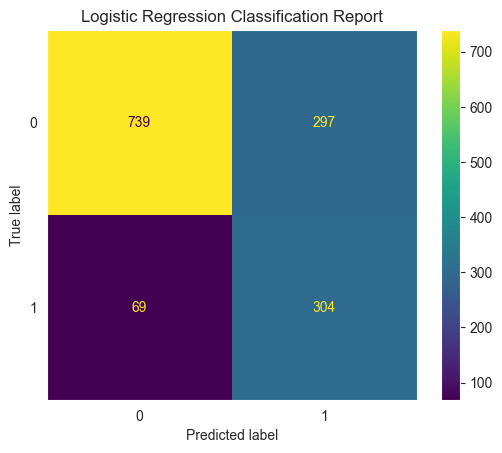

In [171]:
cm = confusion_matrix(y_test, y_hat)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title('Logistic Regression Classification Report')
plt.grid(False)
plt.show()

In [172]:
svm_classifier_pipeline.fit(X_train, y_train)
y_hat = svm_classifier_pipeline.predict(X_test)
print(f'Support Vector Machine Classifier - Accuracy Score: {accuracy_score(y_true=y_test, y_pred=y_hat)}')
print(classification_report(y_true=y_test, y_pred=y_hat))

Support Vector Machine Classifier - Accuracy Score: 0.7395315826827538
              precision    recall  f1-score   support

           0       0.92      0.71      0.80      1036
           1       0.50      0.82      0.62       373

    accuracy                           0.74      1409
   macro avg       0.71      0.76      0.71      1409
weighted avg       0.81      0.74      0.75      1409



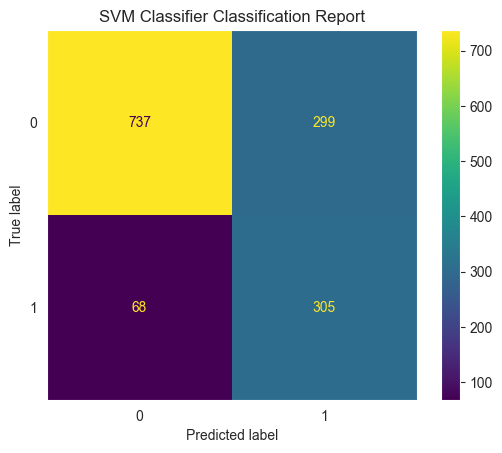

In [173]:
cm = confusion_matrix(y_test, y_hat)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title('SVM Classifier Classification Report')
plt.grid(False)
plt.show()